In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd

# 主成分分析

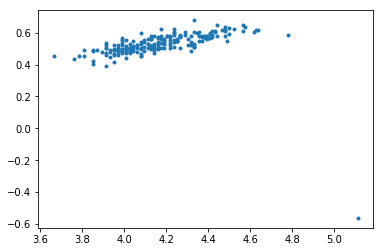

In [2]:
from sklearn.decomposition import PCA    # sklearn の PCA を使う．
dat = pd.read_csv('data/Davis.csv').values    # データ読み込み(pandasを使う)
# 身長の単位を[メートル]に変換し，対数の値を計算．
logdat = np.log(np.c_[dat[:,1],dat[:,2]/100].astype('float'))
# データのプロット
plt.plot(logdat[:,0], logdat[:,1], '.'); plt.show()

In [3]:
# データに主成分分析
pca = PCA()    
pca.fit(logdat) 
pca.components_       # 主成分

array([[ 0.99672116,  0.08091309],
       [ 0.08091309, -0.99672116]])

In [4]:
# インデックス 11 のデータは外れ値として除去．
clean_logdat = np.delete(logdat, 11, axis=0)

# 外れ値を除去したデータに主成分分析
pca = PCA()    
pca.fit(clean_logdat) 
pca.components_       # 主成分

array([[ 0.97754866,  0.21070979],
       [-0.21070979,  0.97754866]])

# 因子分析

In [5]:
from sklearn.datasets import load_boston  # BostonHousing を使う
BostonHousing = load_boston()             # データ読み込み

In [6]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
X = scale(BostonHousing.data)  # データのスケーリング(相関行列に因子分解を適用)

In [7]:
X.shape                        # データ行列のサイズ：13次元506サンプル

(506, 13)

In [8]:
fa = FactorAnalysis(n_components=3)   # 因子数3で推定
rX = fa.fit_transform(X)              # 因子スコア

In [9]:
rX.shape

(506, 3)

In [10]:
fa.components_                        # 因子負荷行列

array([[ 0.60841747, -0.49494108,  0.81348536,  0.00483051,  0.80358983,
        -0.37394421,  0.67493181, -0.71478317,  0.88823336,  0.93426511,
         0.4719411 , -0.46857739,  0.6667707 ],
       [-0.13831681, -0.50420234,  0.26472014,  0.12236686,  0.33682836,
        -0.24812374,  0.4737658 , -0.50642376, -0.31818625, -0.25439366,
        -0.0890454 ,  0.06551875,  0.27791882],
       [-0.0444211 , -0.01663459, -0.02596455,  0.18592351,  0.12404607,
         0.74457979,  0.1306529 , -0.25763679,  0.05555484, -0.00502006,
        -0.27244655, -0.00285167, -0.39184026]])

In [11]:
fa.components_.shape                  # サイズは(因子数, 次元)

(3, 13)

In [12]:
# 因子負荷行列の要素：絶対値の大きさでソート．
BostonHousing.feature_names[np.argsort(np.abs(fa.components_[0,]))]

array(['CHAS', 'RM', 'B', 'PTRATIO', 'ZN', 'CRIM', 'LSTAT', 'AGE', 'DIS',
       'NOX', 'INDUS', 'RAD', 'TAX'],
      dtype='<U7')

# 多次元尺度構成法

In [13]:
import statsmodels.api as sm
from statsmodels.multivariate.factor_rotation import rotate_factors
L, T = sm.multivariate.factor_rotation.rotate_factors(fa.components_.T,'varimax')  # バリマックス回転基準
L

array([[ 0.5663403 ,  0.21804878, -0.15162447],
       [-0.09141312, -0.6634721 ,  0.22563641],
       [ 0.48775161,  0.64424597, -0.28205468],
       [-0.06192479,  0.15857947,  0.14346569],
       [ 0.44283427,  0.74431776, -0.15648091],
       [-0.11671964, -0.14390299,  0.84939224],
       [ 0.25807616,  0.77902084, -0.15355907],
       [-0.27559021, -0.86898553,  0.05168074],
       [ 0.90199198,  0.27086566, -0.07955876],
       [ 0.89765703,  0.32435335, -0.16309324],
       [ 0.41813753,  0.10235314, -0.34578816],
       [-0.41305023, -0.21162195,  0.0920395 ],
       [ 0.34722916,  0.44876794, -0.59447461]])

In [14]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances 
n = 10                              # データ数
k = 2                               # データの次元
V = np.random.rand(n,k)             # 真の配置
d = euclidean_distances(V)          # 距離行列

In [15]:
# 計量的MDS(次元2): 10個の初期値で計算し最適な解を採用
md = MDS(n_components=2, metric=True, dissimilarity='precomputed', n_init=10, max_iter=3000)
md.fit(d)
rV2 = md.embedding_                 # 再構成された2次元点配置

In [16]:
rV2

array([[-0.39935418, -0.32761611],
       [-0.39521646, -0.23558094],
       [ 0.14690616,  0.22804053],
       [ 0.2742899 ,  0.20351661],
       [ 0.52791492, -0.17607083],
       [ 0.04583456,  0.18853876],
       [-0.14410745, -0.42103604],
       [ 0.41853556,  0.01324949],
       [-0.05036984,  0.39640691],
       [-0.42443316,  0.13055162]])

In [17]:
# 計量的MDS(次元1) 
md.set_params(n_components=1)          
md.fit(d)        
rV1 = md.embedding_                 # 再構成された1次元点配置

In [18]:
rV1

array([[ 0.5767132 ],
       [ 0.5215191 ],
       [-0.21186262],
       [-0.31523673],
       [-0.62288188],
       [-0.08207162],
       [ 0.43779832],
       [-0.46814833],
       [-0.09787037],
       [ 0.26204095]])

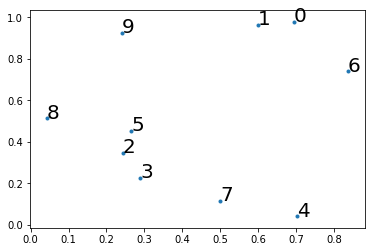

In [19]:
# 元データのプロット
plt.scatter(V[:,0],V[:,1],marker='.'); 
for i,(x,y) in enumerate(zip(V[:,0],V[:,1])): # 点番号も表示
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

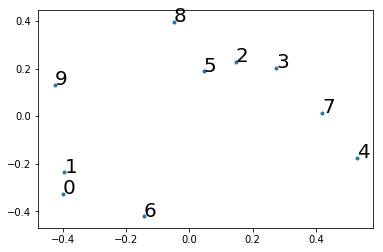

In [20]:
# 計量的MDSで再構成した点のプロット
plt.scatter(rV2[:,0],rV2[:,1],marker='.');    # 点番号も表示
for i,(x,y) in enumerate(zip(rV2[:,0],rV2[:,1])):
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

In [21]:
from sklearn.manifold import MDS
data = pd.read_csv('data/voting.csv').values
#  S:非類似度行列(投票行動)，pidx: 所属する党(0/1)
S=data[:,:15]; pidx=data[:,15]  
col=['red','blue']; mk = ['x','o'] # 所属する党を区別するマーク

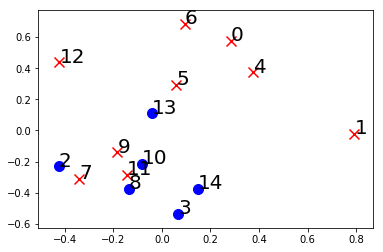

In [22]:
# 非計量的MDS
nmd = MDS(n_components=2, metric=False, dissimilarity='precomputed',  n_init=20,max_iter=3000)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()

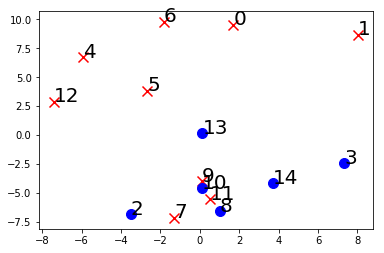

In [23]:
# 計量的MDS
nmd.set_params(metric=True)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()